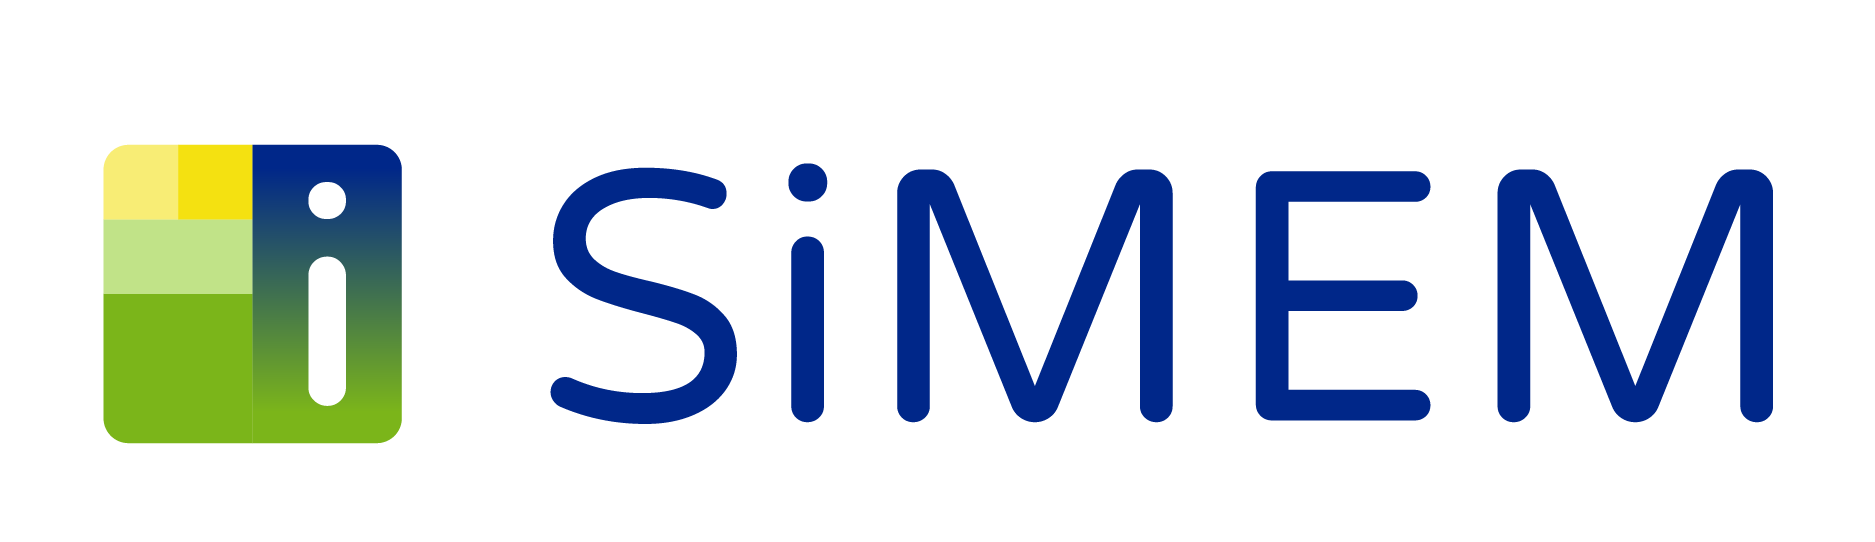

[SiMEM](https://www.simem.co/)

## Caso de uso - Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [2]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho](https://www.simem.co/datadetail/B38EFCD8-C26F-44BF-ADDD-162E64A788F3).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
id_dataset_enficc = 'b38efc'                                              # ID del conjunto de datos a consultar
fecha_inicial = '2025-01-01'                                              # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                                # Fecha de fin del rango de consulta
simem_enficc = ReadSIMEM(id_dataset_enficc, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_enficc = simem_enficc.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
display(df_enficc.head(20))                                               # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Energía Firme del Cargo por Confiabilidad verificada por el Centro Nacional de Despacho"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.001157999038696289
Extraccion de registros: 13.664490222930908
End of data extracting process
****************************************************************************************************


,Fecha,FechaInicio,FechaFin,CodigoPlanta,ENFICCVerificada,FechaPublicacion
0,2025-01-31,2023-12-01,2050-11-30,TEC1,4806987.0,2024-02-08
1,2025-01-31,2022-12-01,2046-11-30,TCBE,806400.0,2023-01-06
2,2025-01-31,2023-12-01,2050-11-30,ESMR,312088.0,2024-02-08
3,2025-01-31,2023-12-01,2050-11-30,URA1,2127258.0,2024-02-08
4,2025-01-31,2023-12-01,2050-11-30,PPA1,654600.0,2024-02-08
5,2025-01-31,2023-12-01,2050-11-30,CLMG,233962.0,2024-02-08
6,2025-01-31,2023-12-01,2050-11-30,TFL4,9957707.0,2024-02-08
7,2025-01-31,2023-12-01,2050-11-30,3IZ6,371517.0,2024-02-08
8,2025-01-31,2023-12-01,2050-11-30,ZPA4,1136565.0,2024-02-08
9,2025-01-31,2023-12-01,2050-11-30,ZPA3,1044547.0,2024-02-08


Se lee el DataFrame con la información de plantas con el objetivo de cruzar la información

In [4]:
id_dataset_plantas = '0BFC9D'                                               # ID del conjunto de datos a consultar
fecha_inicial = '2025-01-01'                                                # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                                  # Fecha de fin del rango de consulta
simem_plantas = ReadSIMEM(id_dataset_plantas, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_plantas = simem_plantas.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
df_plantas

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Parámetros técnicos de las plantas de generación"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0015172958374023438
Extraccion de registros: 10.436033248901367
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,FechaPublicacion,CodigoPlanta,NombrePlanta,CodigoSICAgente,CapEfectivaNeta,FPO,CodigoSubAreaOperativa,CodigoAreaOperativa,TipoDespachoRecurso,TipoClasificacion,TipoGeneracion
0,2025-01-31,P1D,2025-01-31,2R22,LAGUNETA,ENDG,18000.0,2014-12-17,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
1,2025-01-31,P1D,2025-01-31,SNT1,SANTA ANA,ENDG,8000.0,2005-06-09,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
2,2025-01-31,P1D,2025-01-31,2S8N,GUAVIO MENOR,ENDG,9900.0,2016-04-27,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
3,2025-01-31,P1D,2025-01-31,2UPJ,TEQUENDAMA 1,ENDG,14200.0,2018-04-03,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
4,2025-01-31,P1D,2025-01-31,USQ1,USAQUEN,ENDG,1800.0,2013-04-15,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,2025-06-01,P1D,2025-06-01,RPL1,INGENIO RIOPAILA 1,RPEG,16000.0,2018-05-21,Are0032,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59594,2025-06-01,P1D,2025-06-01,PNC1,COGENERADOR PROENCA,PECG,19900.0,2014-04-29,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59595,2025-06-01,P1D,2025-06-01,INC1,INCAUCA 1,NTCG,60000.0,1998-10-21,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica
59596,2025-06-01,P1D,2025-06-01,4WWY,GD SAN MARTIN,EMSG,990.0,2025-05-11,Are0027,Are0056,No Despachado Centralmente,GENERADOR DISTRIBUIDO,Solar


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Los dataframes se filtarán para tener los datos necesarios para la visualización.

In [5]:
df_enficc = df_enficc.sort_values('FechaPublicacion', ascending=False)                                                      # Se ordenan los datos según la Fecha de Publicación

df_enficc_filtrado = df_enficc.drop_duplicates(subset=['FechaInicio','CodigoPlanta'], keep='first').reset_index(drop=True)  # Se obtiene el dato más reciente de cada planta
df_enficc_filtrado = df_enficc_filtrado[['Fecha', 'CodigoPlanta','ENFICCVerificada', 'FechaInicio']]                        # Se seleccionan las columnas necesarias para el análisis

df_enficc_filtrado                                                                                                          # Se muestra el DataFrame filtrado

,Fecha,CodigoPlanta,ENFICCVerificada,FechaInicio
0,2025-06-26,3HF5,176962.0,2023-12-01
1,2025-03-23,TYP2,623520.0,2024-03-14
2,2025-04-02,CHVR,8021002.0,2023-12-01
3,2025-04-02,LTSJ,2328817.0,2023-12-01
4,2025-04-02,TYP4,1140000.0,2023-12-01
...,...,...,...,...
68,2025-03-05,GYPO,1201980.0,2022-12-01
69,2025-01-24,EPFV,236995.0,2022-12-01
70,2025-03-07,TCBE,806400.0,2022-12-01
71,2025-01-30,GEC3,3348225.0,2022-12-01


In [6]:
df_plantas = df_plantas.sort_values('FechaPublicacion', ascending=False)                                          # Se ordenan los datos según la Fecha de Publicación

df_plantas_filtrado = df_plantas.drop_duplicates(subset=['CodigoPlanta'], keep='first').reset_index(drop=True)    # Se obtiene el dato más reciente de cada planta
df_plantas_filtrado = df_plantas_filtrado[['CodigoPlanta','TipoGeneracion']]                                      # Se seleccionan las columnas necesarias para el cruce de información

df_plantas_filtrado                                                                                               # Se muestra el DataFrame de plantas filtrado

,CodigoPlanta,TipoGeneracion
0,3IZ6,Solar
1,ESMR,Hidraulica
2,SMI1,Hidraulica
3,HMIN,Hidraulica
4,PES1,Hidraulica
...,...,...
376,3KJK,Solar
377,3L9B,Solar
378,3ACC,Solar
379,3MS2,Solar


In [7]:
df_completo = pd.merge(df_enficc_filtrado, df_plantas_filtrado, on=['CodigoPlanta', 'CodigoPlanta'], how='left')   # Se une el DataFrame de la ENFICC con el DataFrame de plantas
df_completo

,Fecha,CodigoPlanta,ENFICCVerificada,FechaInicio,TipoGeneracion
0,2025-06-26,3HF5,176962.0,2023-12-01,Solar
1,2025-03-23,TYP2,623520.0,2024-03-14,Termica
2,2025-04-02,CHVR,8021002.0,2023-12-01,Hidraulica
3,2025-04-02,LTSJ,2328817.0,2023-12-01,Hidraulica
4,2025-04-02,TYP4,1140000.0,2023-12-01,Termica
...,...,...,...,...,...
68,2025-03-05,GYPO,1201980.0,2022-12-01,Solar
69,2025-01-24,EPFV,236995.0,2022-12-01,Solar
70,2025-03-07,TCBE,806400.0,2022-12-01,Termica
71,2025-01-30,GEC3,3348225.0,2022-12-01,Termica


In [8]:
df_filtrado = df_completo[['Fecha', 'CodigoPlanta','ENFICCVerificada', 'TipoGeneracion']]   # Selecciona únicamente las columnas 'Fecha','CodigoPlanta', 'TipoGeneracion y 'ENFICCVerificada' del DataFrame
df_filtrado = df_filtrado.sort_values('Fecha', ascending=False)                             # Se ordenan los datos por Fecha
df_filtrado['ENFICCVerificada'] = df_filtrado['ENFICCVerificada']/1000000                   # Se cambia de unidad por Gwh

display(df_filtrado)                                                                        # Muestra el DataFrame filtrado

,Fecha,CodigoPlanta,ENFICCVerificada,TipoGeneracion
0,2025-06-26,3HF5,0.176962,Solar
10,2025-05-22,CLL1,0.773809,Hidraulica
13,2025-05-19,TCDT,12.653987,Termica
67,2025-05-19,SOG1,9.575903,Hidraulica
66,2025-05-19,HMLG,2.290113,Hidraulica
...,...,...,...,...
1,2025-03-23,TYP2,0.623520,Termica
70,2025-03-07,TCBE,0.806400,Termica
68,2025-03-05,GYPO,1.201980,Solar
71,2025-01-30,GEC3,3.348225,Termica


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se grafica el valor del ENFICC por tipo de generación

In [9]:
df_tipoGeneracion = df_filtrado.groupby('TipoGeneracion')['ENFICCVerificada'].sum().reset_index()  # Se agrupan los datos por tipo de Generación

fig = go.Figure()                                               # Crear la figura de gráfico con Plotly

fig.add_trace(go.Bar(                                           # Se añade el gráfico de barras
    x=df_tipoGeneracion['TipoGeneracion'],                      # Valores Eje X
    y=df_tipoGeneracion['ENFICCVerificada']                     # Valores Eje Y
))

fig.update_layout(                                              # Se Configura el diseño del gráfico
    title="ENFICC Verificada agrupada por Tipo de Generación",  # Título del gráfico
    xaxis_title='Tipo Generación',                              # Título Eje X
    yaxis_title='GWh',                                          # Título Eje Y
    template='plotly_white'
)

fig.show()                                                      # Se muestra el gráfico

Se grafican las 5 plantas con mayor ENFICC verificada

In [10]:
df_top_5 = df_filtrado.sort_values(by='ENFICCVerificada', ascending=False).head(5)   # Se ordenan los datos por valor de ENFICC y se seleccionan los 5 mayores

fig = go.Figure(data=[                                  # Se crea la gráfica de barras
    go.Bar(
        x=df_top_5['CodigoPlanta'],                     # Valores Eje X
        y=df_top_5['ENFICCVerificada'],                 # Valores Eje Y
        marker_color='lightgreen'                       # Color del gráfico
    )
])

fig.update_layout(                                      # Configurar el diseño del gráfico
    title='Top 5 Plantas con Mayor ENFICC Verificada',  # Título del gráfico
    xaxis_title='Código Planta',                        # Título Eje X
    yaxis_title='GWh',                                  # Título Eje Y
    template='plotly_white'
)

fig.show()                                              # Se muestra el gráfico

Se grafica el ENFICC de las plantas que se deseen observar

In [11]:
listado_plantas = ['SLVJ', 'URA1']                                                # Listado de plantas por el cuál se desea filtrar

if len(listado_plantas) > 0:
    df_filtrado = df_filtrado[df_filtrado['CodigoPlanta'].isin(listado_plantas)]  # Se filtra por el listado de plantas

fig = go.Figure(data=[                                  # Se crea la gráfica de barras
    go.Bar(
        x=df_filtrado['CodigoPlanta'],                  # Valores Eje X
        y=df_filtrado['ENFICCVerificada'],              # Valores Eje Y
        marker_color='orange'                           # Color del gráfico
    )
])

fig.update_layout(                                      # Configurar el diseño del gráfico
    title='Valor de ENFICC Verificada',                 # Título del gráfico
    xaxis_title='Código Planta',                        # Título Eje X
    yaxis_title='GWh',                                  # Título Eje Y
    template='plotly_white'
)

fig.show()                                              # Se muestra el gráfico